In [137]:
%matplotlib notebook

'''An NOAA dataset has been stored in the file weather_data.csv. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) Daily Global Historical Climatology Network (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

id : station identification code
date : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
element : indicator of element type
TMAX : Maximum temperature (tenths of degrees C)
TMIN : Minimum temperature (tenths of degrees C)
value : data value for element (tenths of degrees C)
For this assignment, you must:

Read the documentation and familiarize yourself with the dataset,
then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014.
The area between the record high and record low temperatures for each day should be shaded.
Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.
The data you have been given is near Ann Arbor, Michigan, United States'''

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('weather_data.csv').sort_values(by='Date')
df['Year'], df['Month-Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))
df = df[df['Month-Date'] != '02-29']

print(df.head())

                ID        Date Element  Data_Value  Year Month-Date
60995  USW00004848  2005-01-01    TMIN           0  2005      01-01
17153  USC00207320  2005-01-01    TMAX         150  2005      01-01
17155  USC00207320  2005-01-01    TMIN         -11  2005      01-01
10079  USW00014833  2005-01-01    TMIN         -44  2005      01-01
10073  USW00014833  2005-01-01    TMAX          33  2005      01-01


In [201]:
#find the Min and Max Temp for each day of the year for the years 2005-2014
Tmin = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})/10
Tmax = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})/10
#find the Min and Max Temp for each day of the year for the year 2015
Tmin15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.min})/10
Tmax15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].groupby('Month-Date').aggregate({'Data_Value':np.max})/10
#List of broken mins and maxs that occured in 2015
broken_min = np.where(Tmin15['Data_Value'] < Tmin['Data_Value'])[0]
broken_max = np.where(Tmax15['Data_Value'] > Tmax['Data_Value'])[0]

#print(type(broken_min))

<IPython.core.display.Javascript object>


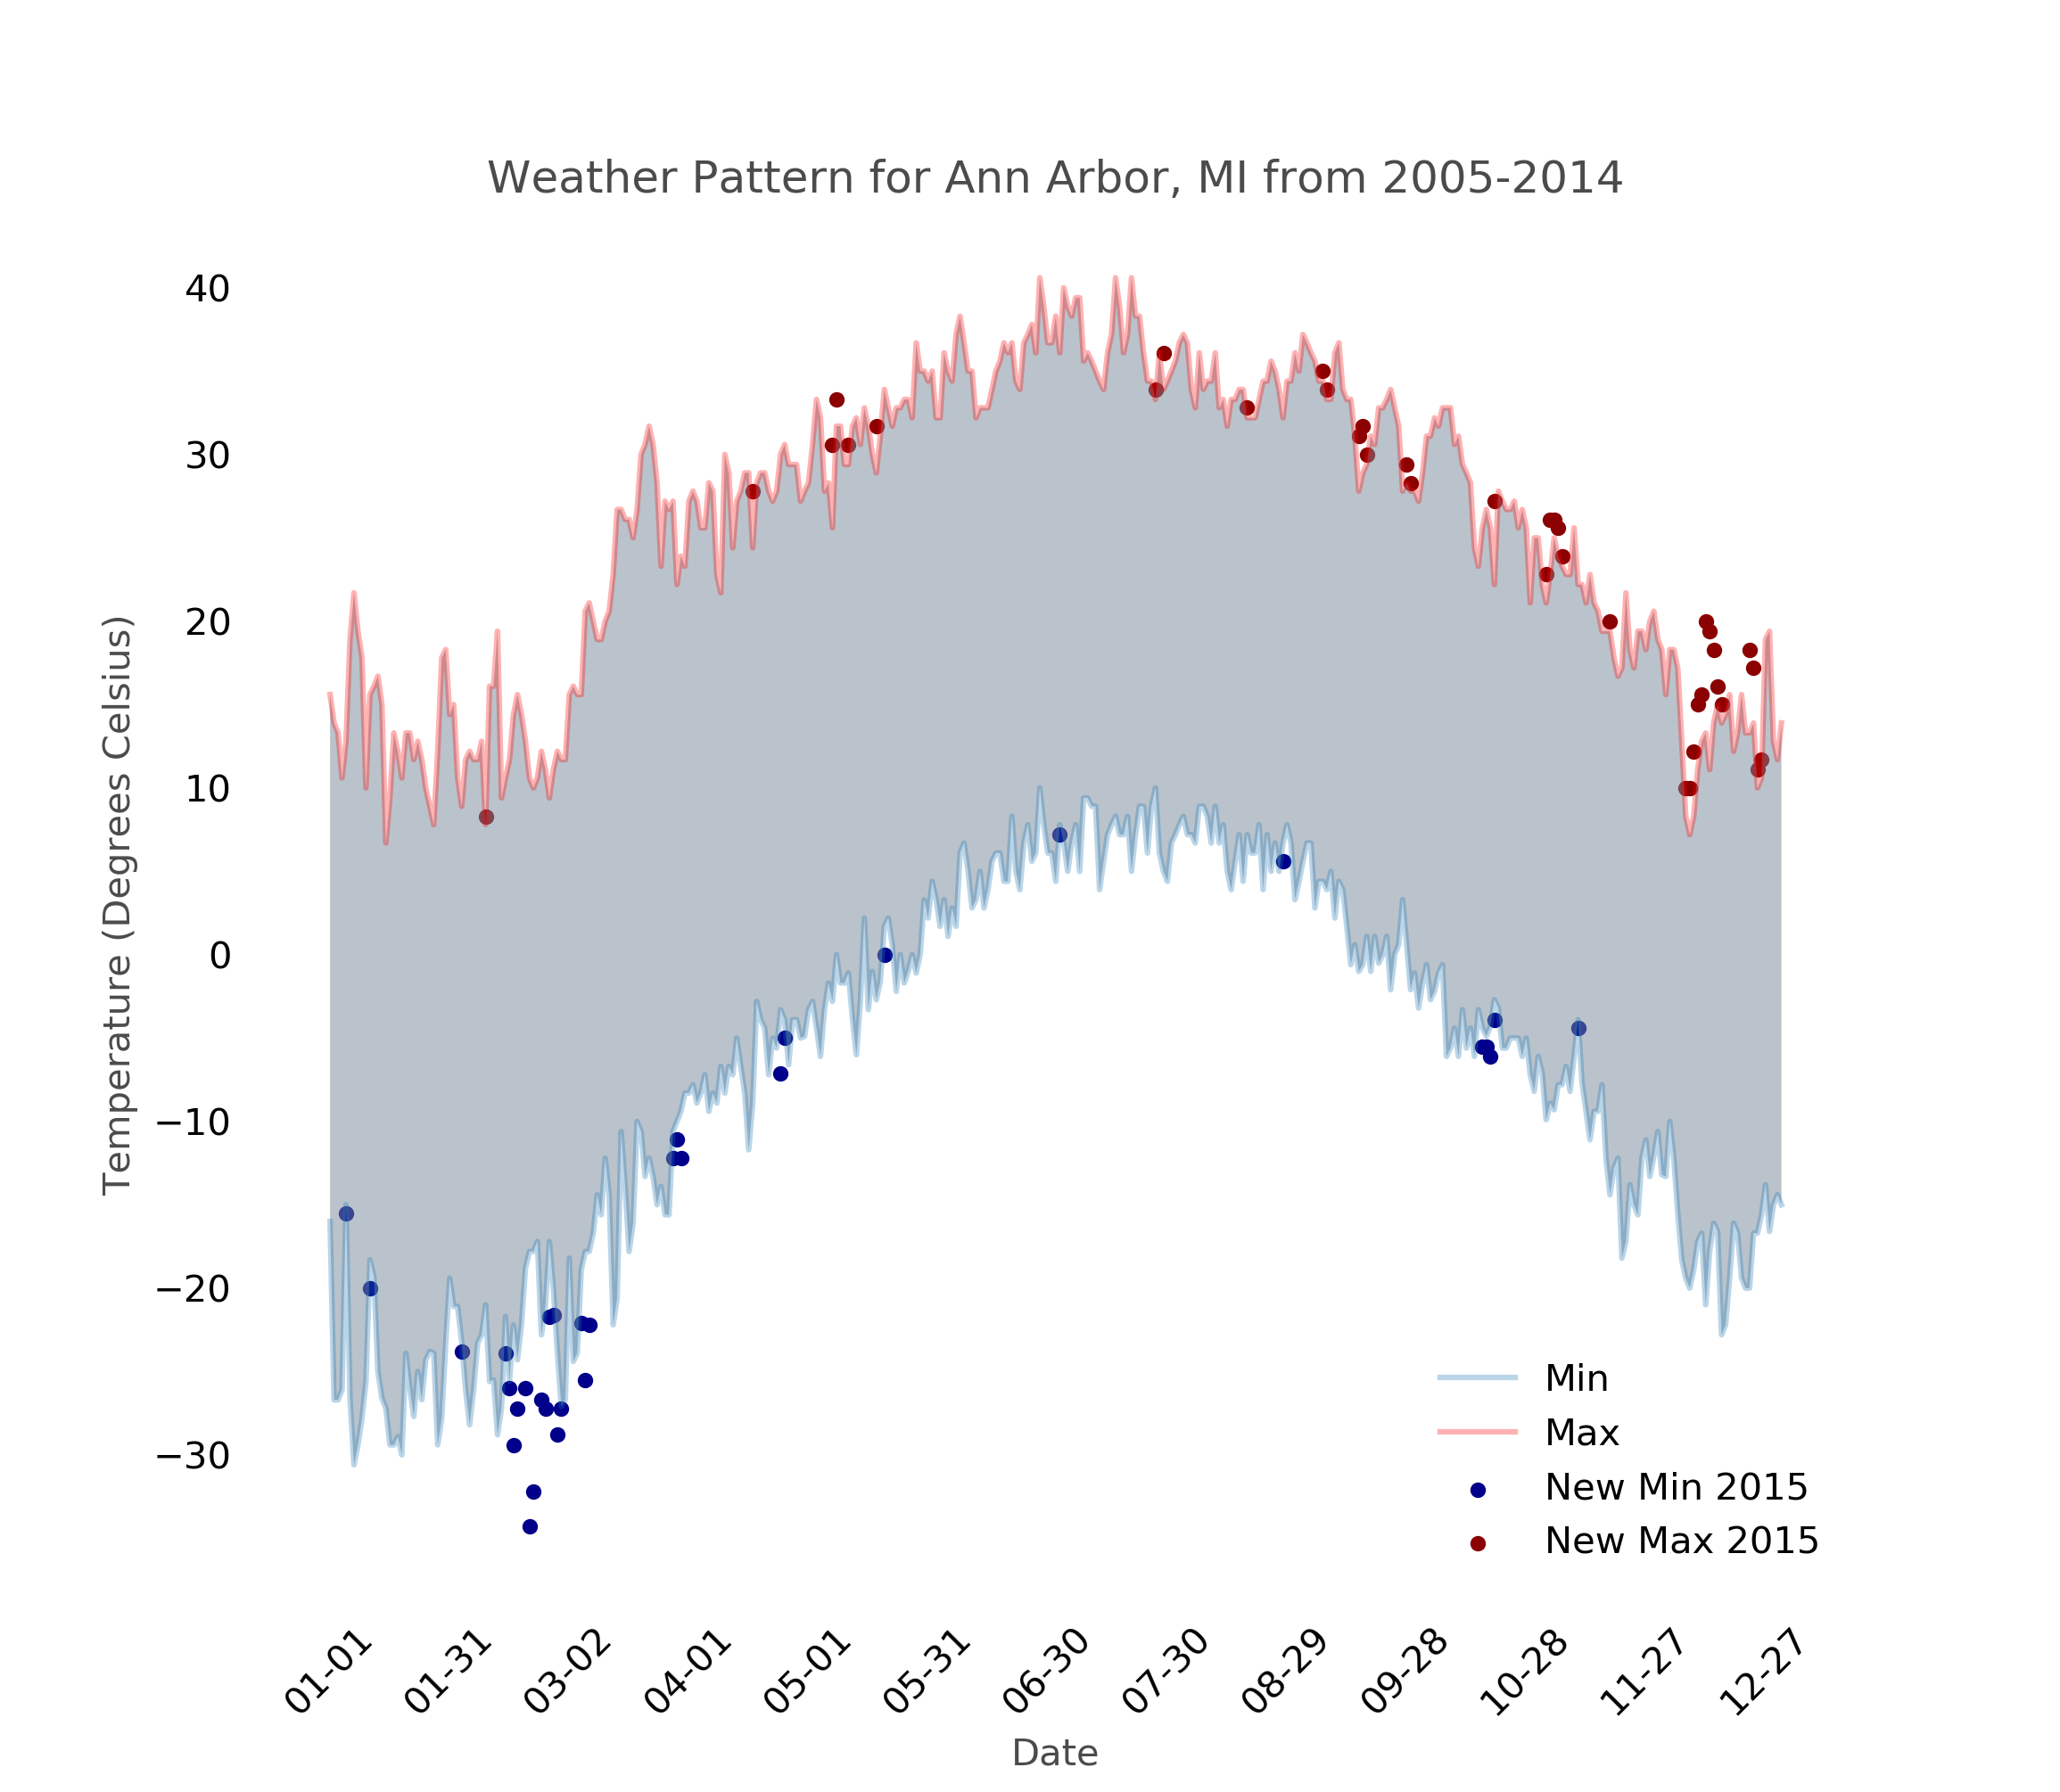

In [202]:
plt.figure()
# plot the min and max temp data
plt.plot(Tmin.values, '-', Tmax.values, '-r', alpha=0.3)
# plot the broken temps from 2015
plt.scatter(broken_min, Tmin15.iloc[broken_min].values, s=10, c='darkblue', label='New Low 2015')
plt.scatter(broken_max, Tmax15.iloc[broken_max].values, s=10, c='darkred', label='New High 2015')
# fill the area between the Min and Max temperature data
#uses range,lower bound, upper bound, color, transparency value 0-1
plt.gca().fill_between(range(len(Tmin)), Tmin['Data_Value'], Tmax['Data_Value'], facecolor='lightslategrey', alpha=0.5)

In [203]:
# soften all labels by turning grey
plt.xlabel('Date', alpha=0.7)
plt.ylabel('Temperature (Degrees Celsius)', alpha=0.7)
plt.title('Weather Pattern for Ann Arbor, MI from 2005-2014', alpha=0.7)
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Min', 'Max', 'New Min 2015', 'New Max 2015'],loc = 4, frameon = False)
# clean up ticks (both axes)
plt.xticks(range(0, len(Tmin), 30), Tmin.index[range(0, len(Tmin), 30)], rotation = '45')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)